In [105]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

city_data_to_load = os.path.join('data','city_data.csv')
ride_data_to_load = os.path.join('data','ride_data.csv')


# Read the City and Ride Data and load them into data frames
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

city_df = pd.DataFrame(city)
ride_df = pd.DataFrame(ride)

# merge the data into a single dataset
df_pyber = ride_df.merge(city_df, on = 'city')
df_pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [106]:
#create df for each city type
urban = df_pyber.loc[df_pyber['type'] == 'Urban',:]
suburban = df_pyber.loc[df_pyber['type'] == 'Suburban',:]
rural = df_pyber.loc[df_pyber['type'] == 'Rural',:]


## Bubble Plot of Ride Sharing Data

In [107]:
#calculate average fare groups and round to nearst hundreth 
u_avg_fare = urban[['fare', 'city']]
u_avg_fare_g = u_avg_fare.groupby([ 'city']).mean()
u_avg_fare_g['fare'] = round(u_avg_fare_g['fare'], 2)

s_avg_fare = suburban[['fare',  'city']]
s_avg_fare_g = s_avg_fare.groupby([ 'city']).mean()
s_avg_fare_g['fare'] = round(s_avg_fare_g['fare'], 2)

r_avg_fare = rural[['fare',  'city']]
r_avg_fare_g = r_avg_fare.groupby([ 'city']).mean()
r_avg_fare_g['fare'] = round(r_avg_fare_g['fare'], 2)


In [108]:
#Calculate the count of rides per city
u_rides_p_city = urban[['city','ride_id', ]]
u_rides_p_city_g = u_rides_p_city.groupby(['city']).count()
u_rides_p_city_g = u_rides_p_city_g.rename(columns= {'ride_id':'rides per city'})

s_rides_p_city = suburban[['city','ride_id', ]]
s_rides_p_city_g = s_rides_p_city.groupby(['city']).count()
s_rides_p_city_g = s_rides_p_city_g.rename(columns= {'ride_id':'rides per city'})

r_rides_p_city = rural[['city','ride_id']]
r_rides_p_city_g = r_rides_p_city.groupby(['city']).count()
r_rides_p_city_g = r_rides_p_city_g.rename(columns= {'ride_id':'rides per city'})


In [109]:
#calculate the number of drivers per city
u_driver_count = urban[['city', 'driver_count']]
u_driver_count = u_driver_count.drop_duplicates()
u_driver_count_g = u_driver_count.groupby(['city']).sum()

s_driver_count = suburban[['city', 'driver_count']]
s_driver_count = s_driver_count.drop_duplicates()
s_driver_count_g = s_driver_count.groupby(['city']).sum()

r_driver_count = rural[['city','driver_count']]
r_driver_count = r_driver_count.drop_duplicates()
r_driver_count_g = r_driver_count.groupby(['city']).sum()


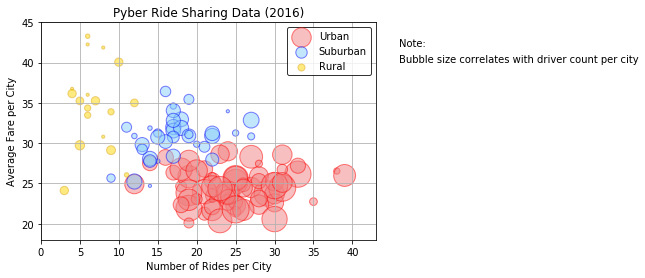

<Figure size 432x288 with 0 Axes>

In [110]:
#urban
u_x = u_rides_p_city_g['rides per city']
u_y = u_avg_fare_g['fare']
u_s = u_driver_count_g['driver_count']

#suburban
s_x = s_rides_p_city_g['rides per city']
s_y = s_avg_fare_g['fare']
s_s = s_driver_count_g['driver_count']

#rural
r_x = r_rides_p_city_g['rides per city']
r_y = r_avg_fare_g['fare']
r_s = r_driver_count_g['driver_count']


#plotting each of the city types. The size value is multiplied by 10 to amplify the difference in driver count by city.
Urban = plt.scatter([u_x],[u_y], s = u_s *10, alpha = 0.50, c = 'lightcoral', edgecolor = 'red', label ='Urban' )
Suburban = plt.scatter([s_x],[s_y], s = s_s *10, alpha = 0.50, c = 'lightskyblue', edgecolor = 'blue', label ='Suburban' )
Rural = plt.scatter([r_x],[r_y], s = r_s *10, alpha = 0.50, c = 'gold', edgecolor = 'goldenrod', label ='Rural')

#set the limits for x and y
plt.ylim(18,45)
plt.xlim(0,43)

#add grid lines
plt.grid()

#add labels to plot
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.text(46,42,'Note:')
plt.text(46,40,'Bubble size correlates with driver count per city')

#add legend to plot
plt.legend(frameon = True, edgecolor = 'black', loc = 'best')

#show plot
plt.show()

# Save Figure
plt.savefig("Pyber Ride Sharing.png")


## Total Fares by City Type

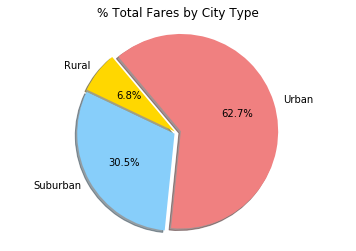

In [111]:
# Calculate Type Percents
df_total_fares = df_pyber[['type', 'fare']].groupby('type').sum()
df_total_fares.head()
labels = ['Rural', 'Suburban', 'Urban']
color = ['gold', 'lightskyblue', 'lightcoral']
explode = (.02, .02, .05)

# Build Pie Chart
plt.pie(df_total_fares[['fare']], explode=explode, labels = labels, colors = color
        , autopct="%1.1f%%", shadow=True, startangle=130)

plt.axis('equal')

#add title
plt.title('% Total Fares by City Type')

# Save Figure
plt.savefig('Total Fares.png')


## Total Rides by City Type

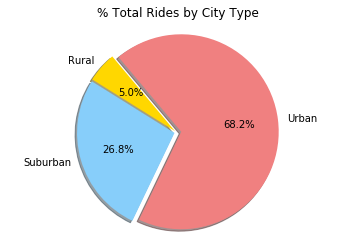

In [112]:
# Calculate total Ride Percents
df_total_rides = df_pyber[['type', 'ride_id']].groupby('type').sum()
df_total_rides.head()

#labels colors and explode values
labels = ['Rural', 'Suburban', 'Urban']
color = ['gold', 'lightskyblue', 'lightcoral']
explode = (.02, .02, .05)

# Build Pie Chart
plt.pie(df_total_rides[['ride_id']], explode=explode, labels = labels, colors = color
        , autopct="%1.1f%%", shadow=True, startangle=130)

plt.axis("equal")

#add title
plt.title('% Total Rides by City Type')

# Save Figure
plt.savefig("Total rides.png")

## Total Drivers by City Type

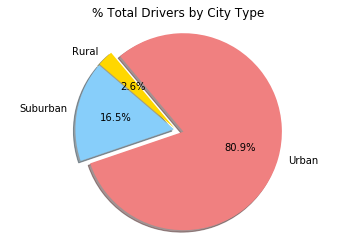

In [113]:
# Calculate Driver Percents
df_total_drivers = df_pyber[['type', 'driver_count', 'city']]
df_total_drivers = df_total_drivers.drop_duplicates()
df_total_drivers = df_total_drivers.groupby(['type']).sum()

#labels colors and explode values
labels = ['Rural', 'Suburban', 'Urban']
color = ['gold', 'lightskyblue', 'lightcoral']
explode = (.02, .02, .08)

# Build Pie Chart
plt.pie(df_total_drivers[['driver_count']], explode=explode, labels = labels, colors = color
        , autopct="%1.1f%%", shadow=True, startangle=130)

plt.axis("equal")

#add title
plt.title("% Total Drivers by City Type")

# Save Figure
plt.savefig("Total drivers.png")